# Supplemental Material

This file contains the supplemental materials for *Title of paper*. It includes all supplemental figures and tables. Additional materials are made available on our study’s OSF page (<https://osf.io/zh5gn/>).

------------------------------------------------------------------------

In [ ]:
#| label: set up

library(dplyr) |> suppressMessages()
library(skimr)

In [ ]:
#| label: read in data

d_0 <- data.table::fread(here::here(rdrive_path, "batch_results_new_method_0.csv"))
d_03 <- data.table::fread(here::here(rdrive_path, "batch_results_new_method_03.csv"))
d_05 <- data.table::fread(here::here(rdrive_path, "batch_results_new_method_05.csv"))

d_20_covs <- data.table::fread(here::here(rdrive_path, "batch_results_20_covs.csv"))
d_n50 <- data.table::fread(here::here(rdrive_path, "batch_results_n50.csv"))

d2_0 <- data.table::fread(here::here(rdrive_path, "batch_results_new_20K_0.csv"))
d2_03 <- data.table::fread(here::here(rdrive_path, "batch_results_new_20K_03.csv"))
d2_05 <- data.table::fread(here::here(rdrive_path, "batch_results_new_20K_05.csv"))

d_wo_x_og <- data.table::fread(here::here(rdrive_path, "batch_results_methods_wo_x_og_seed.csv"))
d_wo_x_new <- data.table::fread(here::here(rdrive_path, "batch_results_methods_wo_x_new_seed.csv"))

In [ ]:
#| label: combine data

d_0 <- rbind(d_0, d_20_covs |> filter(b_x == 0))
d_03 <- rbind(d_03, d_20_covs |> filter(b_x == 0.3))
d_05 <- rbind(d_05, d_20_covs |> filter(b_x == 0.5))

d_0 <- rbind(d_0, d_n50 |> filter(b_x == 0))
d_03 <- rbind(d_03, d_n50 |> filter(b_x == 0.3))
d_05 <- rbind(d_05, d_n50 |> filter(b_x == 0.5))

d_0 <- rbind(d_0, d2_0)
d_03 <- rbind(d_03, d2_03)
d_05 <- rbind(d_05, d2_05)

d_0 <- rbind(d_0, d_wo_x_og |> filter(b_x == 0))
d_0 <- rbind(d_0, d_wo_x_new |> filter(b_x == 0))
d_03 <- rbind(d_03, d_wo_x_og |> filter(b_x == 0.3))
d_03 <- rbind(d_03, d_wo_x_new |> filter(b_x == 0.3))
d_05 <- rbind(d_05, d_wo_x_og |> filter(b_x == 0.5))
d_05 <- rbind(d_05, d_wo_x_new |> filter(b_x == 0.5))

In [ ]:
#| label: factor levels

d_0 <- d_0 |> 
  mutate(method = factor(method, c("no_covs", "all_covs", "p_hacked", "r", "partial_r", 
                                   "full_lm", "full_lm_wo_x", "lasso", "lasso_wo_x")))

d_03 <- d_03 |> 
  mutate(method = factor(method, c("no_covs", "all_covs", "p_hacked", "r", "partial_r", 
                                   "full_lm", "full_lm_wo_x", "lasso", "lasso_wo_x")))

d_05 <- d_05 |> 
  mutate(method = factor(method, c("no_covs", "all_covs", "p_hacked", "r", "partial_r", 
                                   "full_lm", "full_lm_wo_x", "lasso", "lasso_wo_x")))

### Type I error

In [ ]:
#| label: histogram variable 0

h0 <- d_0 |> 
  group_by(method, n_obs, n_covs, r_ycov, p_good_covs, r_cov) |> 
  summarise(type_I = mean(p_value < 0.05),
            .groups = "drop")

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.

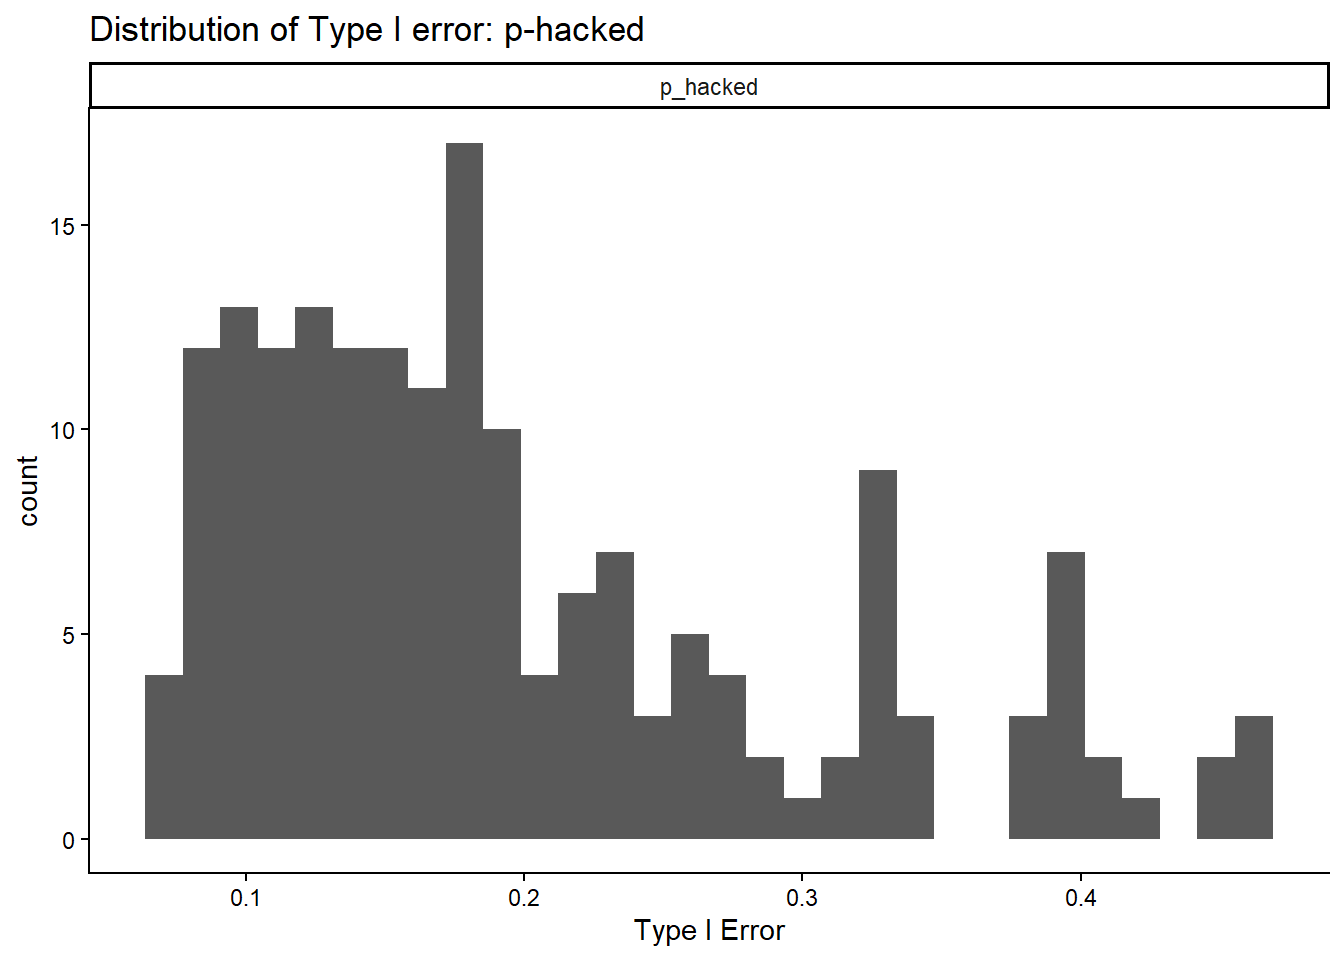

In [ ]:
#| label: fig-histogram-phack

h0 |>
  filter(method == "p_hacked") |> 
  ggplot(aes(x = type_I)) +
  geom_histogram() +
  facet_wrap(~ method) +
  labs(x = "Type I Error",
       title = "Distribution of Type I error: p-hacked")

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.

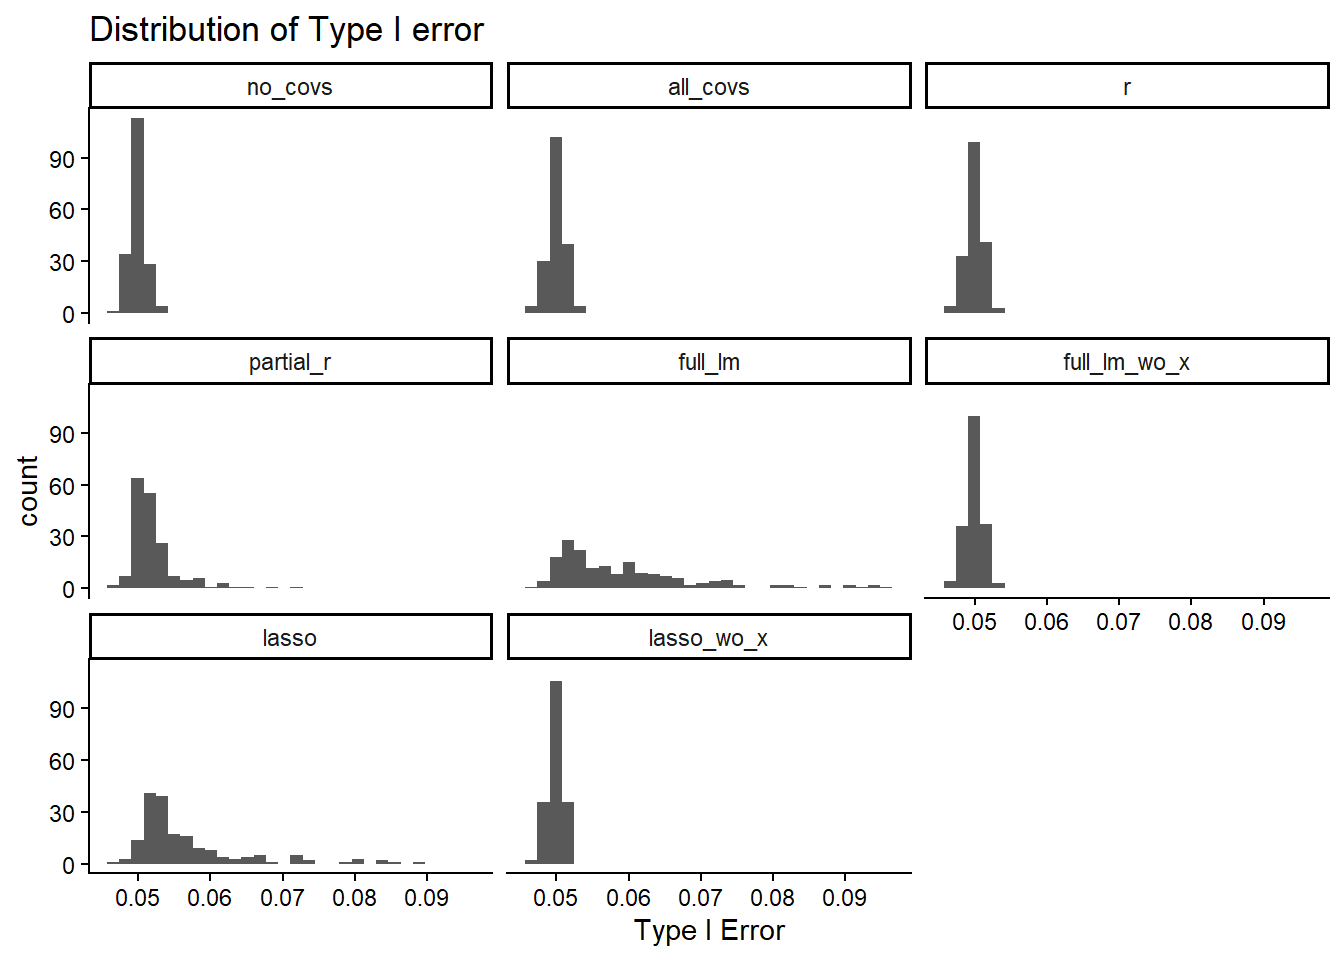

In [ ]:
#| label: fig-histograms-all-0

h0 |>
  filter(method != "p_hacked") |> 
  ggplot(aes(x = type_I)) +
  geom_histogram() +
  facet_wrap(~ method) +
  labs(x = "Type I Error",
       title = "Distribution of Type I error")

In [ ]:
#| label: tbl-typeI-nobs 

d_0 |> 
  group_by(method, n_obs, n_covs, r_ycov, p_good_covs, r_cov) |> 
  summarise(prop_sig = mean(p_value < 0.05),
            .groups = "drop") |> 
  group_by(n_obs, method) |> 
  summarise(typeI_min = min(prop_sig),
            typeI_max = max(prop_sig),
            typeI_mean = mean(prop_sig),
            .groups = "drop") |> 
  kbl(caption = "Type I error by n_obs")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

In [ ]:
#| label: tbl-typeI-ncovs

d_0 |> 
  group_by(method, n_obs, n_covs, r_ycov, p_good_covs, r_cov) |> 
  summarise(prop_sig = mean(p_value < 0.05),
            .groups = "drop") |> 
  group_by(n_covs, method) |> 
  summarise(typeI_min = min(prop_sig),
            typeI_max = max(prop_sig),
            typeI_mean = mean(prop_sig),
            .groups = "drop") |> 
  kbl(caption = "Type I error by n_covs")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

In [ ]:
#| label: tbl-typeI-pgoodcovs

d_0 |> 
  group_by(method, n_obs, n_covs, r_ycov, p_good_covs, r_cov) |> 
  summarise(prop_sig = mean(p_value < 0.05),
            .groups = "drop") |> 
  group_by(p_good_covs, method) |> 
  summarise(typeI_min = min(prop_sig),
            typeI_max = max(prop_sig),
            typeI_mean = mean(prop_sig),
            .groups = "drop") |> 
  kbl(caption = "Type I error by p_good_covs")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

In [ ]:
#| label: tbl-typeI-rycov

d_0 |> 
  group_by(method, n_obs, n_covs, r_ycov, p_good_covs, r_cov) |> 
  summarise(prop_sig = mean(p_value < 0.05),
            .groups = "drop") |> 
  group_by(r_ycov, method) |> 
  summarise(typeI_min = min(prop_sig),
            typeI_max = max(prop_sig),
            typeI_mean = mean(prop_sig),
            .groups = "drop") |> 
  kbl(caption = "Type I error by y-cov correlations")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

### Type II error

In [ ]:
#| label: histograms variable 03

h03 <- d_03 |> 
  group_by(method, n_obs, n_covs, r_ycov, p_good_covs, r_cov) |> 
  summarise(type_II = mean(p_value >= 0.05),
            .groups = "drop")

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.

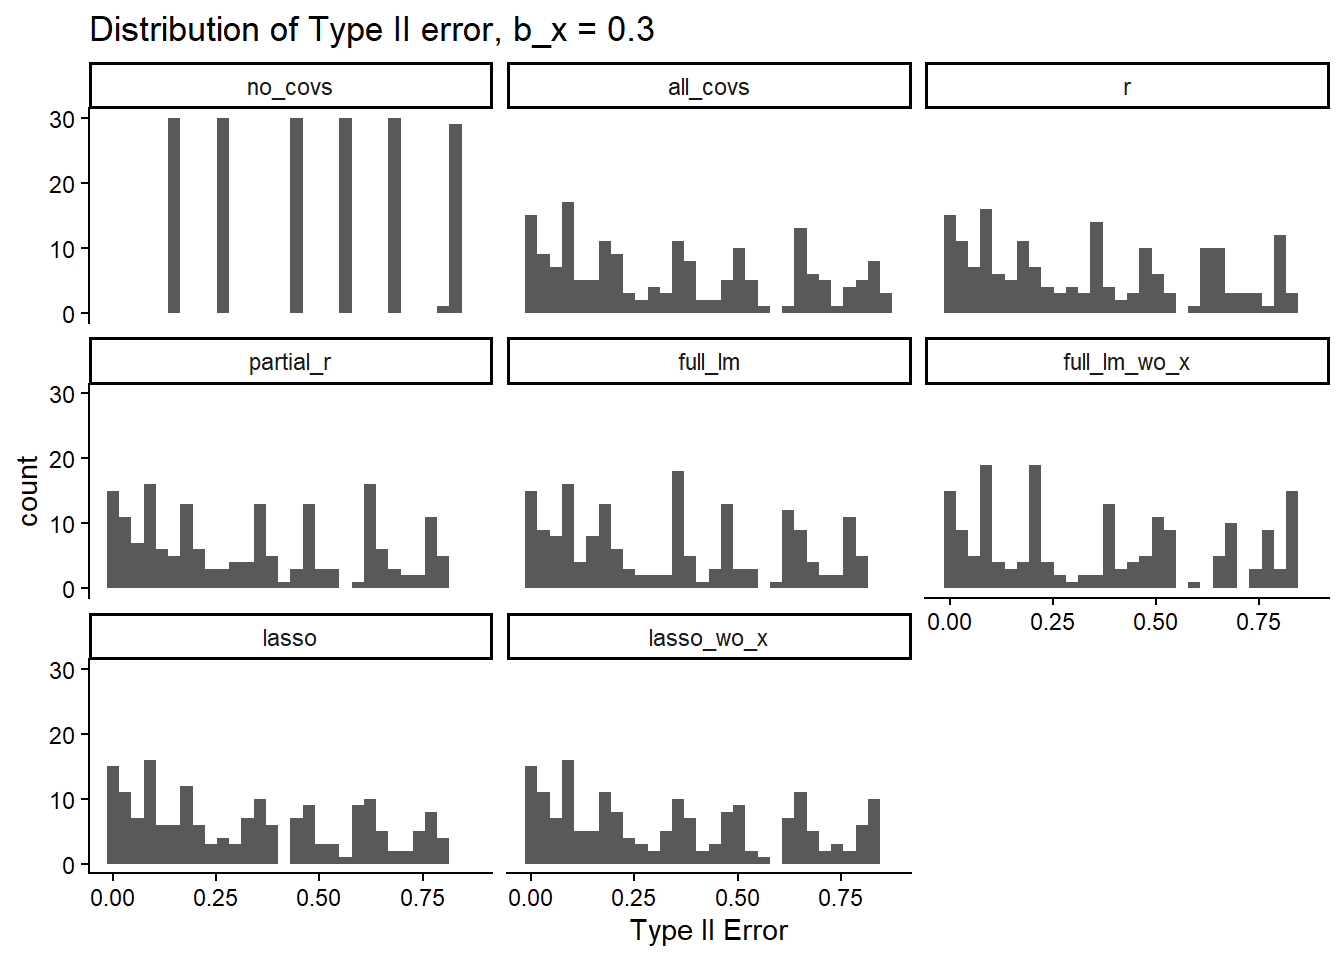

In [ ]:
#| label: fig-histograms-all-03

h03 |>
  filter(method != "p_hacked") |> 
  ggplot(aes(x = type_II)) +
  geom_histogram() +
  facet_wrap(~ method) +
  labs(x = "Type II Error",
       title = "Distribution of Type II error, b_x = 0.3")

In [ ]:
#| label: histograms variable 05

h05 <- d_05 |> 
  group_by(method, n_obs, n_covs, r_ycov, p_good_covs, r_cov) |> 
  summarise(type_II = mean(p_value >= 0.05),
            .groups = "drop")

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.

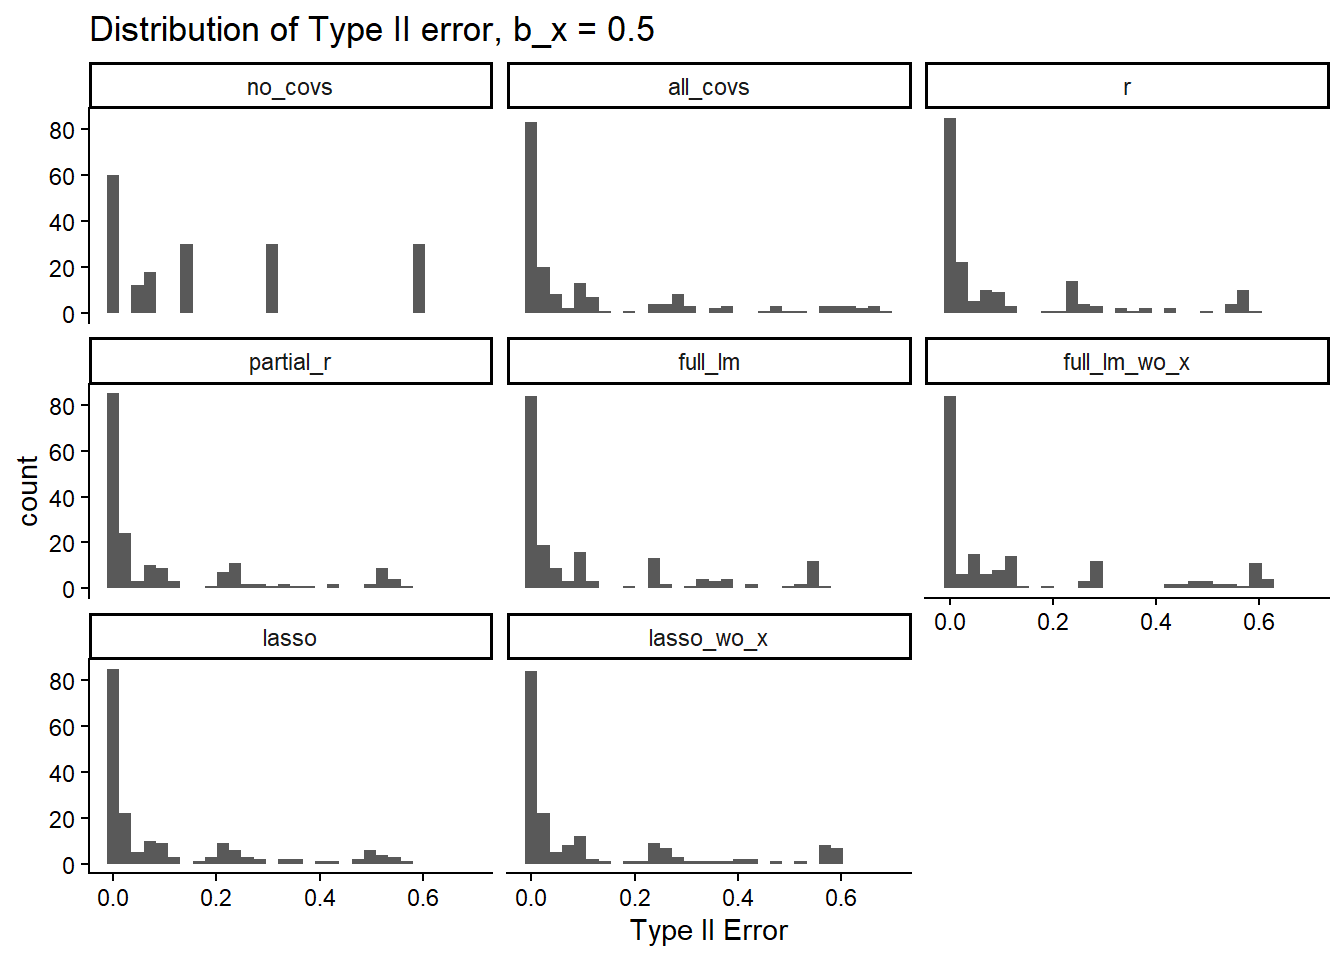

In [ ]:
#| label: fig-histograms-all-05

h05 |>
  filter(method != "p_hacked") |> 
  ggplot(aes(x = type_II)) +
  geom_histogram() +
  facet_wrap(~ method) +
  labs(x = "Type II Error",
       title = "Distribution of Type II error, b_x = 0.5")

In [ ]:
#| label: tbl-typeII-nobs-03

d_03 |> 
  filter(method != "p_hacked") |> 
  group_by(method, n_obs, n_covs, r_ycov, p_good_covs, r_cov) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  group_by(n_obs, method) |> 
  summarise(typeII_min = min(prop_not_sig),
            typeII_max = max(prop_not_sig),
            typeII_mean = mean(prop_not_sig),
            .groups = "drop") |> 
  kbl(caption = "Type II error by n_obs, b_x = 0.3")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

In [ ]:
#| label: tbl-typeII-nobs-05

d_05 |> 
  filter(method != "p_hacked") |> 
  group_by(method, n_obs, n_covs, r_ycov, p_good_covs, r_cov) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  group_by(n_obs, method) |> 
  summarise(typeII_min = min(prop_not_sig),
            typeII_max = max(prop_not_sig),
            typeII_mean = mean(prop_not_sig),
            .groups = "drop") |> 
  kbl(caption = "Type II error by n_obs, b_x = 0.5")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

In [ ]:
#| label: tbl-typeII-ncovs-03

d_03 |> 
  filter(method != "p_hacked") |> 
  group_by(method, n_obs, n_covs, r_ycov, p_good_covs, r_cov) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  group_by(n_covs, method) |> 
  summarise(typeII_min = min(prop_not_sig),
            typeII_max = max(prop_not_sig),
            typeII_mean = mean(prop_not_sig),
            .groups = "drop") |> 
  kbl(caption = "Type II error by n_covs, b_x = 0.3")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

In [ ]:
#| label: tbl-typeII-ncovs-05

d_05 |> 
  filter(method != "p_hacked") |> 
  group_by(method, n_obs, n_covs, r_ycov, p_good_covs, r_cov) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  group_by(n_covs, method) |> 
  summarise(typeII_min = min(prop_not_sig),
            typeII_max = max(prop_not_sig),
            typeII_mean = mean(prop_not_sig),
            .groups = "drop") |> 
  kbl(caption = "Type II error by n_covs, b_x = 0.5")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

In [ ]:
#| label: tbl-typeII-pgoodcovs-03

d_03 |> 
  filter(method != "p_hacked") |> 
  group_by(method, n_obs, n_covs, r_ycov, p_good_covs, r_cov) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  group_by(p_good_covs, method) |> 
  summarise(typeII_min = min(prop_not_sig),
            typeII_max = max(prop_not_sig),
            typeII_mean = mean(prop_not_sig),
            .groups = "drop") |> 
  kbl(caption = "Type II error by p_good_covs, b_x = 0.3")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

In [ ]:
#| label: tbl-typeII-pgoodcovs-05

d_05 |> 
  filter(method != "p_hacked") |> 
  group_by(method, n_obs, n_covs, r_ycov, p_good_covs, r_cov) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  group_by(p_good_covs, method) |> 
  summarise(typeII_min = min(prop_not_sig),
            typeII_max = max(prop_not_sig),
            typeII_mean = mean(prop_not_sig),
            .groups = "drop") |> 
  kbl(caption = "Type II error by p_good_covs, b_x = 0.5")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

In [ ]:
#| label: tbl-typeII-rycov-03

d_03 |> 
  filter(method != "p_hacked") |> 
  group_by(method, n_obs, n_covs, r_ycov, p_good_covs, r_cov) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  group_by(r_ycov, method) |> 
  summarise(typeII_min = min(prop_not_sig),
            typeII_max = max(prop_not_sig),
            typeII_mean = mean(prop_not_sig),
            .groups = "drop") |> 
  kbl(caption = "Type II error by correlations, b_x = 0.3")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

In [ ]:
#| label: tbl-typeII-rycov-05

d_05 |> 
  filter(method != "p_hacked") |> 
  group_by(method, n_obs, n_covs, r_ycov, p_good_covs, r_cov) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  group_by(r_ycov, method) |> 
  summarise(typeII_min = min(prop_not_sig),
            typeII_max = max(prop_not_sig),
            typeII_mean = mean(prop_not_sig),
            .groups = "drop") |> 
  kbl(caption = "Type II error by correlations, b_x = 0.5")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

### TPR & FPR

In [ ]:
#| label: tbl-tpr-0

d_0 |> 
  group_by(method) |> 
  summarise(covs_tpr_mean = sprintf("%.3f", mean(covs_tpr)),
            .groups = "drop") |> 
  kbl(caption = "TPR, b_x = 0")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

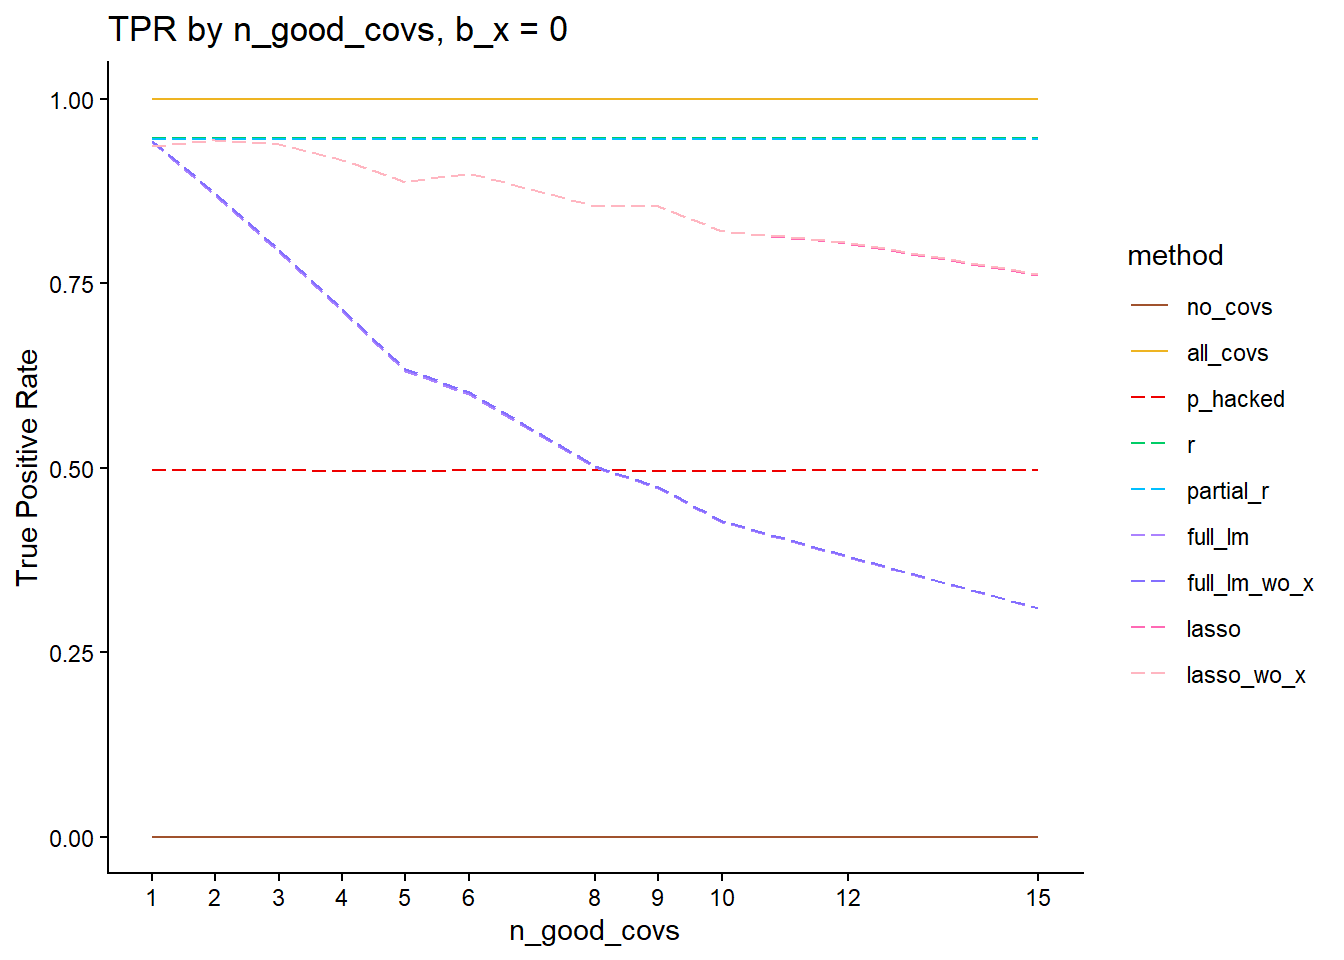

In [ ]:
#| label: fig-tpr-0

d_0 |> 
  mutate(n_good_covs = n_covs * p_good_covs) |> 
  group_by(method, n_good_covs) |> 
  summarise(covs_tpr_mean = mean(covs_tpr),
            .groups = "drop") |> 
  ggplot(aes(x = n_good_covs, y = covs_tpr_mean, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15)) +
  labs(y = "True Positive Rate",
       title = "TPR by n_good_covs, b_x = 0") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)

In [ ]:
#| label: tbl-tpr-03

d_03 |> 
  group_by(method) |> 
  summarise(covs_tpr_mean = sprintf("%.3f", mean(covs_tpr)),
            .groups = "drop") |> 
  kbl(caption = "TPR, b_x = 0.3")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

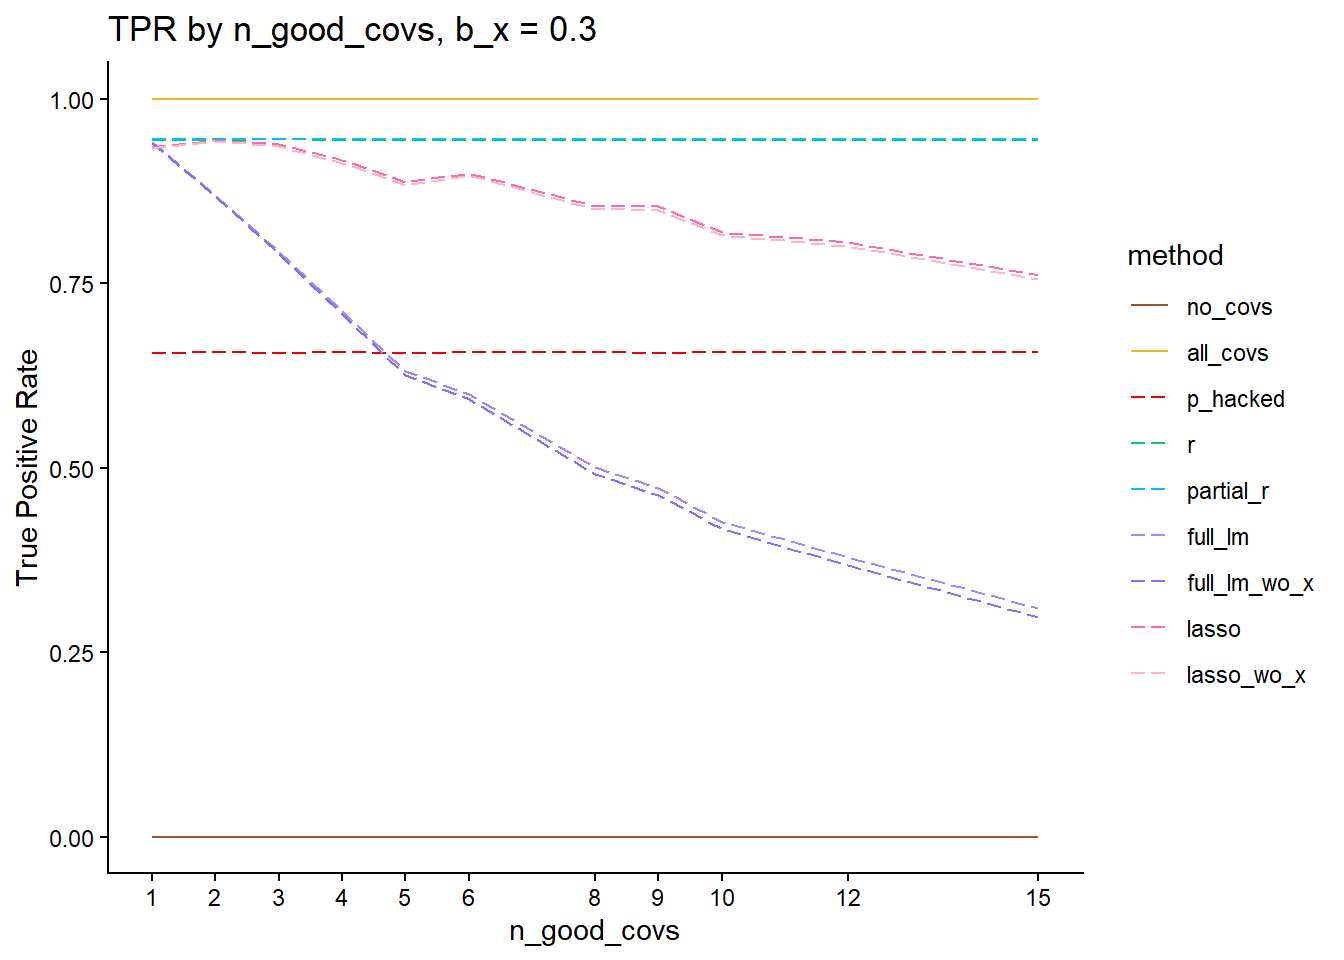

In [ ]:
#| label: fig-tpr-03

d_03 |> 
  mutate(n_good_covs = n_covs * p_good_covs) |> 
  group_by(method, n_good_covs) |> 
  summarise(covs_tpr_mean = mean(covs_tpr),
            .groups = "drop") |> 
  ggplot(aes(x = n_good_covs, y = covs_tpr_mean, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15)) +
  labs(y = "True Positive Rate",
       title = "TPR by n_good_covs, b_x = 0.3") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)

In [ ]:
#| label: tbl-tpr-05

d_05 |> 
  group_by(method) |> 
  summarise(covs_tpr_mean = sprintf("%.3f", mean(covs_tpr)),
            .groups = "drop") |> 
  kbl(caption = "TPR, b_x = 0.5")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

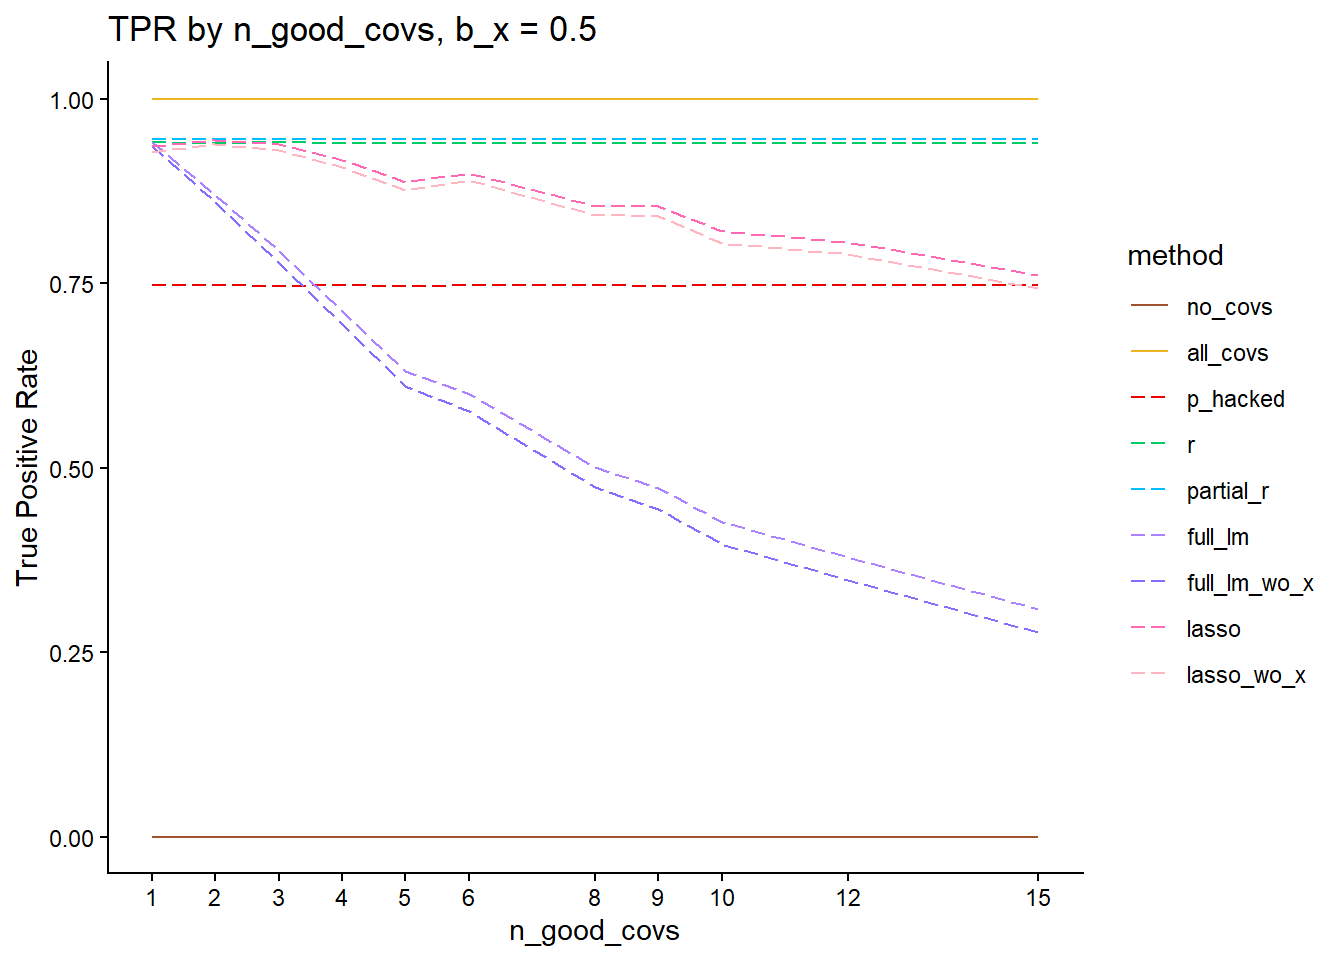

In [ ]:
#| label: fig-tpr-05

d_05 |> 
  mutate(n_good_covs = n_covs * p_good_covs) |> 
  group_by(method, n_good_covs) |> 
  summarise(covs_tpr_mean = mean(covs_tpr),
            .groups = "drop") |> 
  ggplot(aes(x = n_good_covs, y = covs_tpr_mean, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15)) +
  labs(y = "True Positive Rate",
       title = "TPR by n_good_covs, b_x = 0.5") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)

In [ ]:
#| label: tbl-fpr-0

d_0 |> 
  group_by(method) |> 
  summarise(covs_fpr_mean = sprintf("%.3f", mean(covs_fpr)),
            .groups = "drop") |> 
  kbl(caption = "FPR, b_x = 0")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

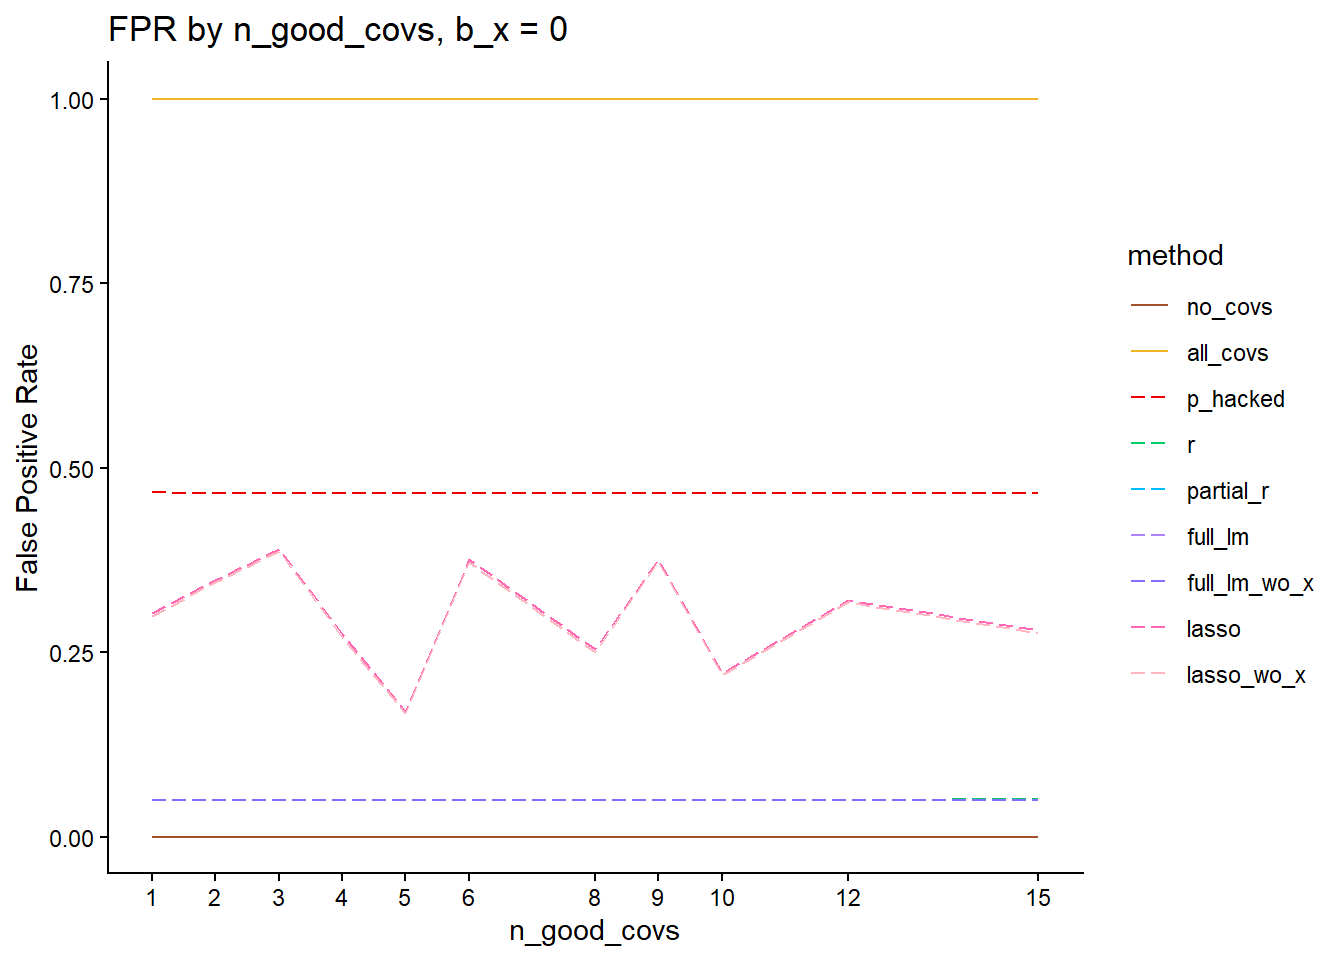

In [ ]:
#| label: fig-fpr-0

d_0 |> 
  mutate(n_good_covs = n_covs * p_good_covs) |> 
  group_by(method, n_good_covs) |> 
  summarise(covs_fpr_mean = mean(covs_fpr),
            .groups = "drop") |> 
  ggplot(aes(x = n_good_covs, y = covs_fpr_mean, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15)) +
  labs(y = "False Positive Rate",
       title = "FPR by n_good_covs, b_x = 0") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)

In [ ]:
#| label: tbl-fpr-03

d_03 |> 
  group_by(method) |> 
  summarise(covs_fpr_mean = sprintf("%.3f", mean(covs_fpr)),
            .groups = "drop") |> 
  kbl(caption = "FPR, b_x = 0.3")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

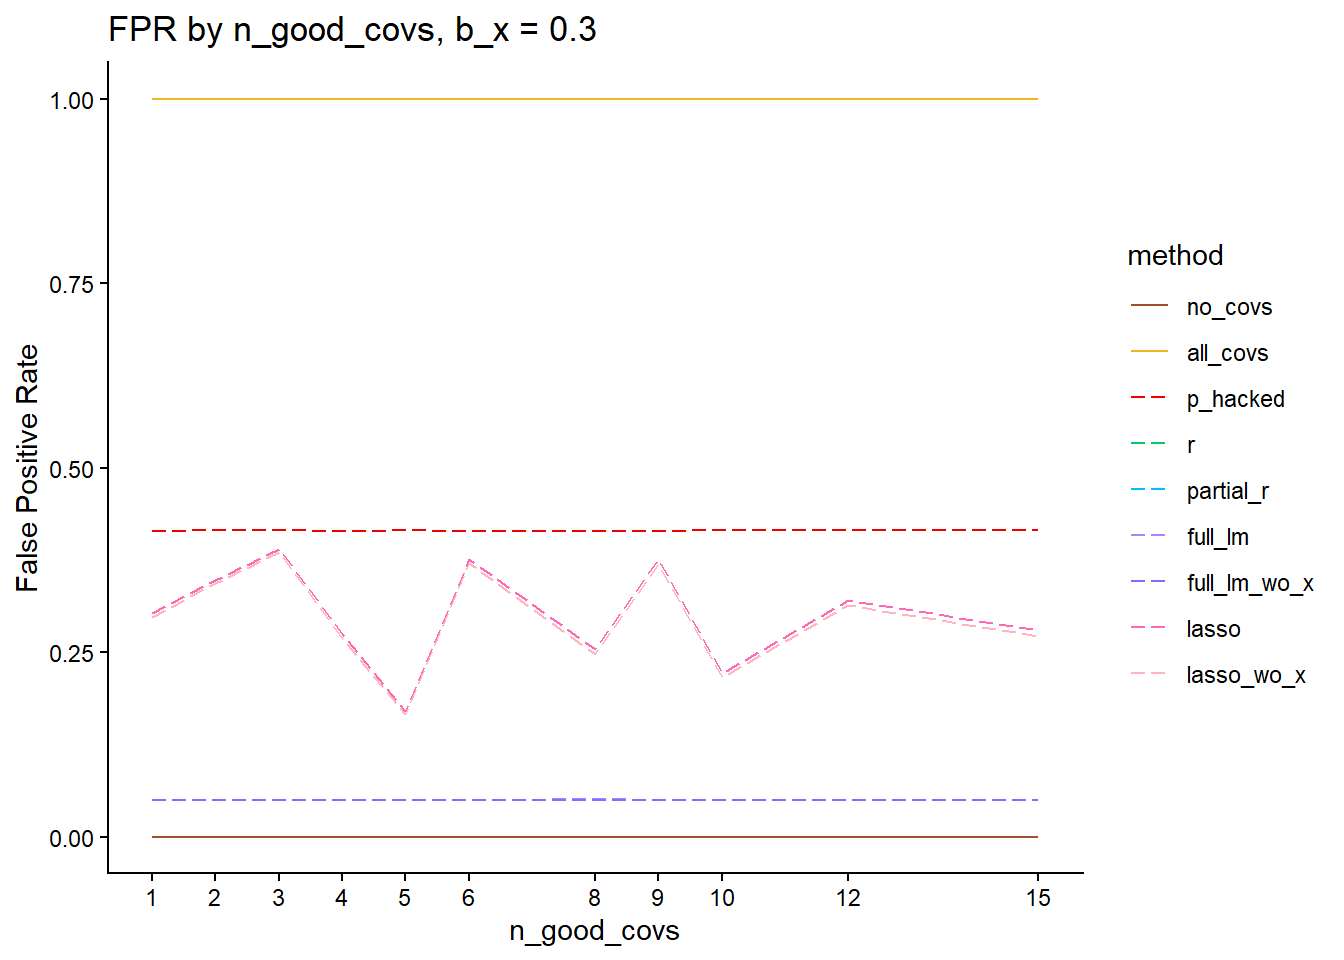

In [ ]:
#| label: fig-fpr-03

d_03 |> 
  mutate(n_good_covs = n_covs * p_good_covs) |> 
  group_by(method, n_good_covs) |> 
  summarise(covs_fpr_mean = mean(covs_fpr),
            .groups = "drop") |> 
  ggplot(aes(x = n_good_covs, y = covs_fpr_mean, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15)) +
  labs(y = "False Positive Rate",
       title = "FPR by n_good_covs, b_x = 0.3") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)

In [ ]:
#| label: tbl-fpr-05

d_05 |> 
  group_by(method) |> 
  summarise(covs_fpr_mean = sprintf("%.3f", mean(covs_fpr)),
            .groups = "drop") |> 
  kbl(caption = "FPR, b_x = 0.5")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

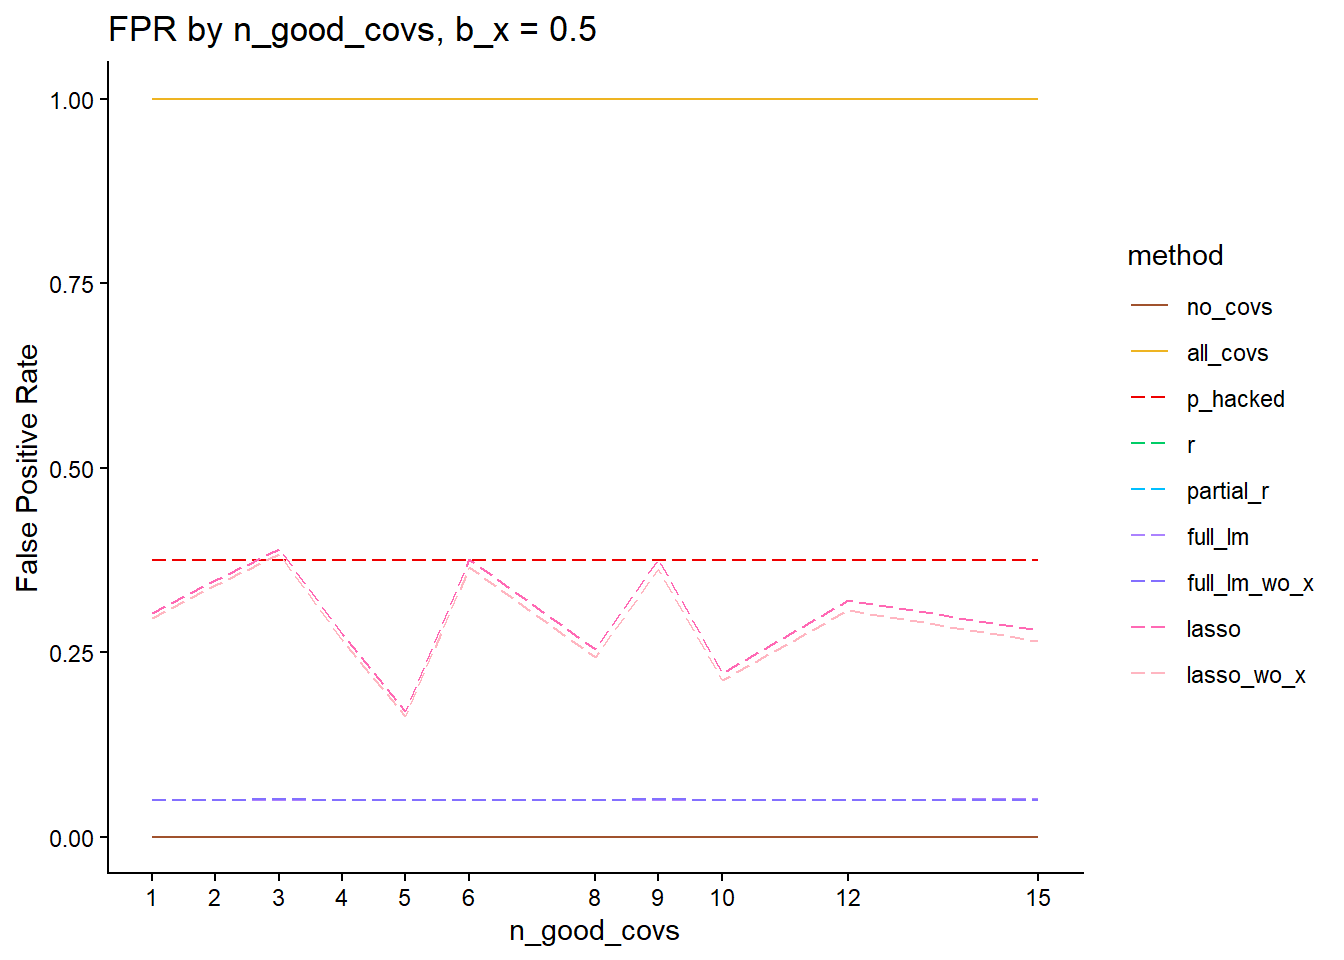

In [ ]:
#| label: fig-fpr-05

d_05 |> 
  mutate(n_good_covs = n_covs * p_good_covs) |> 
  group_by(method, n_good_covs) |> 
  summarise(covs_fpr_mean = mean(covs_fpr),
            .groups = "drop") |> 
  ggplot(aes(x = n_good_covs, y = covs_fpr_mean, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15)) +
  labs(y = "False Positive Rate",
       title = "FPR by n_good_covs, b_x = 0.5") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)

In [ ]:
#| label: tbl-est-sd-se-0

d_0 |> 
  group_by(method) |> 
  summarise(mean_estimate = sprintf("%.3f", mean(estimate)*-1),
            SD_estimate = sd(estimate),
            SE_mean = sqrt(mean(SE^2)),
            difference = SD_estimate - SE_mean) |> 
  kbl(caption = "b_x = 0")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

In [ ]:
#| label: tbl-est-sd-se-03

d_03 |> 
  filter(method != "p_hacked") |> 
  group_by(method) |> 
  summarise(mean_estimate = mean(estimate),
            SD_estimate = sd(estimate),
            mean_SE = sqrt(mean(SE^2)),
            difference = SD_estimate - mean_SE) |> 
  kbl(caption = "Estimate, SD, SE: b_x = 0.3")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")

In [ ]:
#| label: tbl-est-sd-se-05

d_05 |> 
  filter(method != "p_hacked") |> 
  group_by(method) |> 
  summarise(mean_estimate = mean(estimate),
            SD_estimate = sd(estimate),
            mean_SE = sqrt(mean(SE^2)),
            difference = SD_estimate - mean_SE) |> 
  kbl(caption = "Estimate, SD, SE: b_x = 0.5")

Warning in attr(x, "align"): 'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")